In [1]:
from imgproc_utils import *
from skimage.feature import canny


In [4]:
work_dir = '/Users/robinhood/Dropbox (HMS)/Data/imaging/processing_test'
channel_dict = {'DAPI': 0, 'TL':1, 'gene1':2, 'gene2':3, 'gene3':4,}
channel_list = ['DAPI', 'gene1', 'gene2', 'gene3'] #keep for iteration
shape_channel = 'DAPI'
ap_channel = 'DAPI'

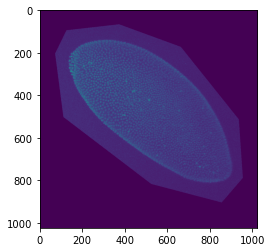

In [5]:
# filename = 'psc_20210927_krgt_8.czi'
file_list = [file for file in os.listdir(work_dir) if file[-4:] == '.czi']
filename = file_list[5]

path = os.path.join(work_dir, filename)
czi = czifile.imread(path)
img=czi.squeeze()
data = {}
for channel in channel_list:
    data[channel] = img[channel_dict[channel],...]
    
xdim = img.shape[2]
ydim = img.shape[3]
z_plane = img.shape[1]/2
z_plane = round(z_plane)

max_AP = data[ap_channel].max(0) # this will be how to pick AP axis
# zshape = data[shape_channel][z_plane,:,:]
zshape = data[shape_channel].max(0)
threshed = []
#zshape = exposure.adjust_gamma(zshape)
plt.imshow(zshape)

In [ ]:
filename = file_list[1]
data, _ = load_data(os.path.join(work_dir, filename), channel_dict, channel_list)
method = 'jefe_2'
zshape, rotation_axis, rotated_AP, xs, ys = get_orientation(data, method)
zedge = canny(zshape)
plt.imshow(zedge)

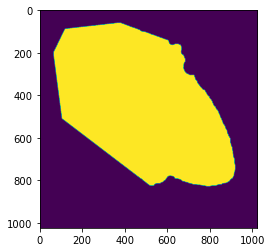

In [4]:
## THRESHOLD DILATION
#zshape = data[shape_channel].max(0)
zshape = data[shape_channel].std(0)
    #make the mask of the embryo shape
zshape = exposure.adjust_gamma(zshape)
# fig, ax = filters.try_all_threshold(zshape, figsize=(16,10))
bkgd = filters.threshold_otsu(zshape)
# bkgd = filters.threshold_otsu(np.nanquantile(zshape.flatten(), 0.7))
max_signal = np.max(zshape)-1#np.quantile(zshape, 0.7) 

#zshape = filters.threshold_sauvola(zshape)#,r=bkgd)
zshape = filters.apply_hysteresis_threshold(zshape, bkgd, max_signal)
zshape = filters.threshold_sauvola(zshape)#,r=bkgd)
zshape = morphology.binary_closing(zshape)
footprint=morphology.disk(15)
zshape = morphology.binary_dilation(zshape, footprint)
zshape = morphology.binary_closing(zshape)
zshape = morphology.binary_erosion(zshape, footprint)

plt.imshow(zshape)
# zshape.shape

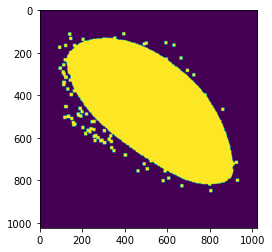

In [63]:
## THRESHOLD DILATION
zshape = data[shape_channel].max(0)
    #make the mask of the embryo shape
zshape = exposure.adjust_gamma(zshape)
# fig, ax = filters.try_all_threshold(zshape, figsize=(16,10))
bkgd = filters.threshold_otsu(np.nanquantile(zshape.flatten(), 0.75))
max_signal = np.quantile(zshape, 0.93)
zshape = morphology.remove_small_objects(zshape, 500)
zshape = filters.apply_hysteresis_threshold(zshape, bkgd, max_signal)
zshape = filters.threshold_sauvola(zshape)#,r=bkgd)
zshape = morphology.binary_closing(zshape)
# footprint=morphology.disk(25)
# zshape = morphology.binary_dilation(zshape, footprint)

plt.imshow(zshape)
# zshape.shape

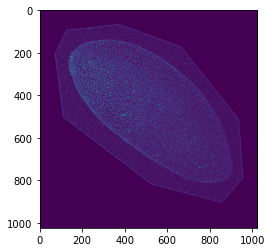

In [64]:
from skimage.filters import sobel
from skimage import segmentation

zshape = data[shape_channel].max(0)
zshape = exposure.adjust_gamma(zshape)
zshape = sobel(zshape)
bkgd = filters.threshold_otsu(np.nanquantile(zshape.flatten(), 0.75))
max_signal = np.quantile(zshape, 0.99)


plt.imshow(zshape)


37.02440589538325

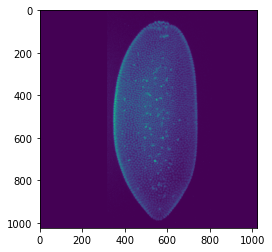

In [106]:
# from sklearn.preprocessing import normalize

# zshape = normalize(data[shape_channel].max(0))
zshape = data[shape_channel].std(0)
bkgd = zshape.min()
zshape -= bkgd
zshape[zshape < 0] = 0

bkgd = filters.threshold_otsu(zshape)
zshape -= bkgd
zshape[zshape < 0] = 0

# zshape = zshape.max(0)
plt.imshow(zshape)
bkgd

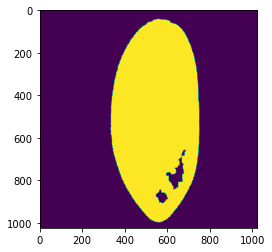

In [104]:
zshape = exposure.adjust_gamma(zshape)
# fig, ax = filters.try_all_threshold(zshape, figsize=(16,10))
bkgd = filters.threshold_otsu(np.nanquantile(zshape.flatten(), 0.75))
max_signal = np.max(zshape)-1#np.quantile(zshape, 0.7) 

#zshape = filters.threshold_sauvola(zshape)#,r=bkgd)
zshape = filters.apply_hysteresis_threshold(zshape, bkgd, max_signal)
zshape = filters.threshold_sauvola(zshape)#,r=bkgd)
zshape = morphology.binary_closing(zshape)
# footprint=morphology.disk(25)
# zshape = morphology.binary_dilation(zshape, footprint)

plt.imshow(zshape)

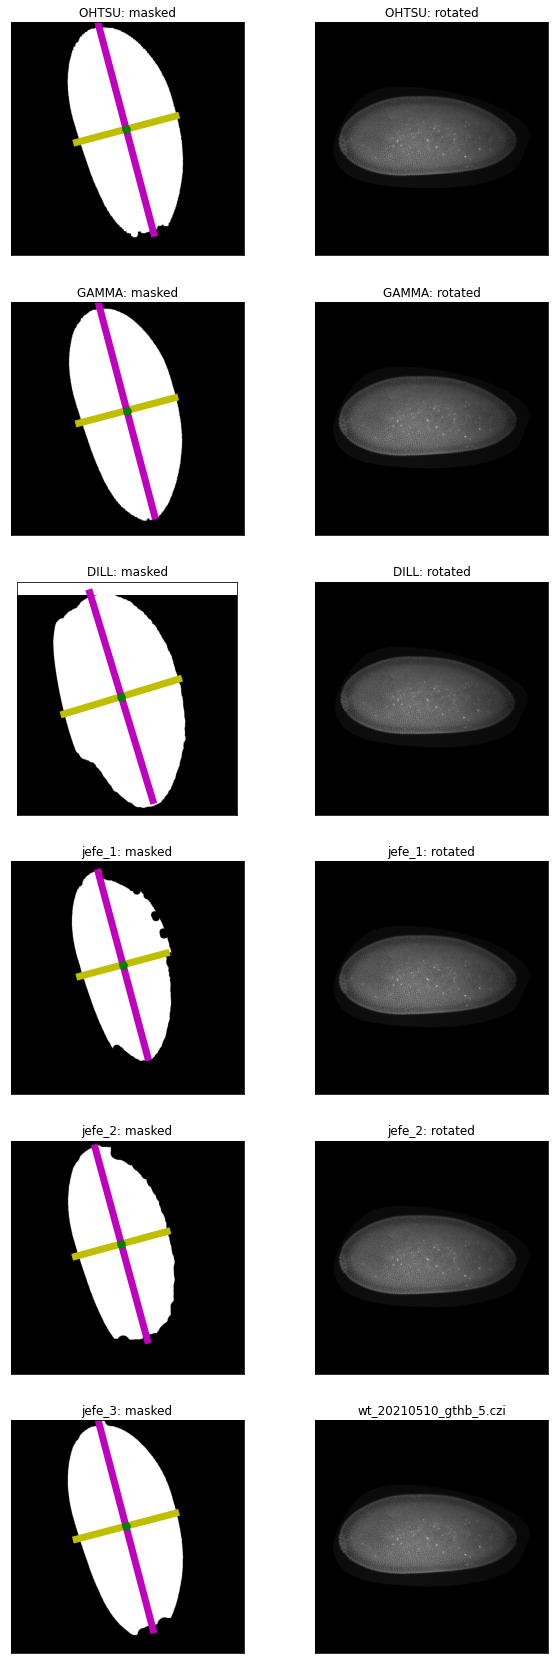

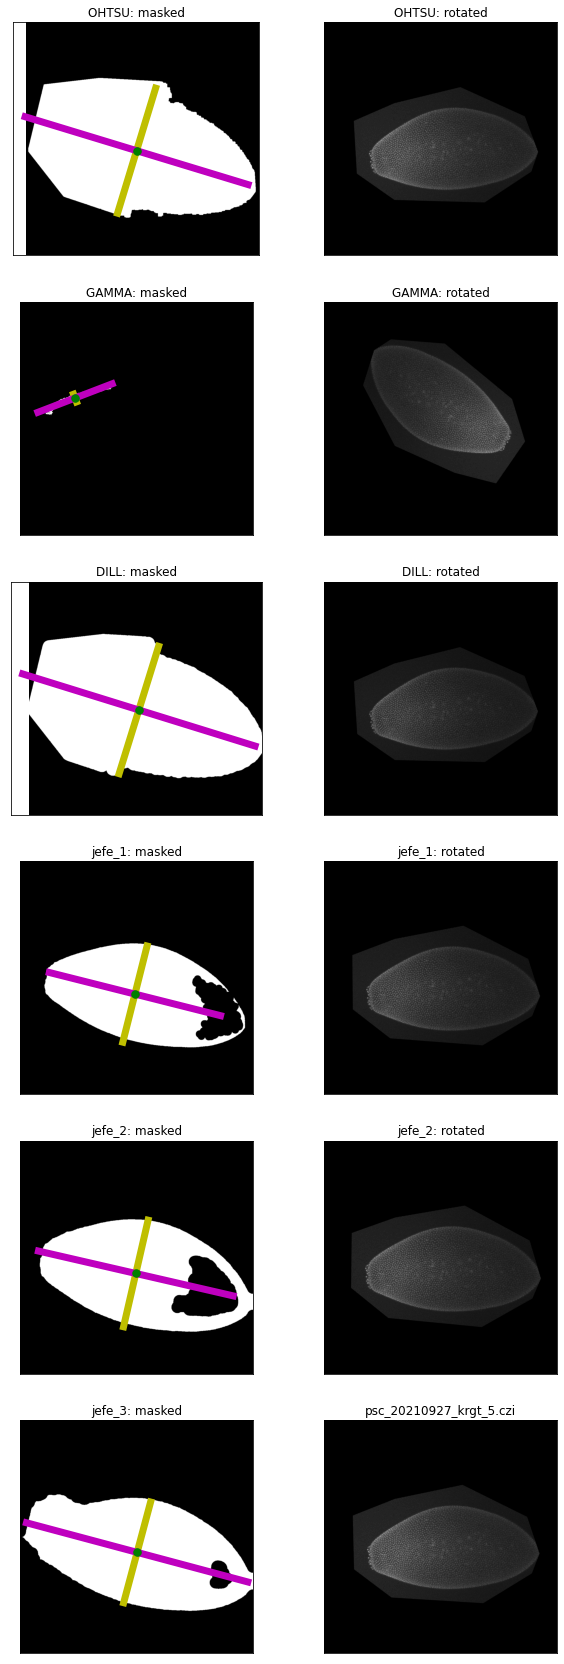

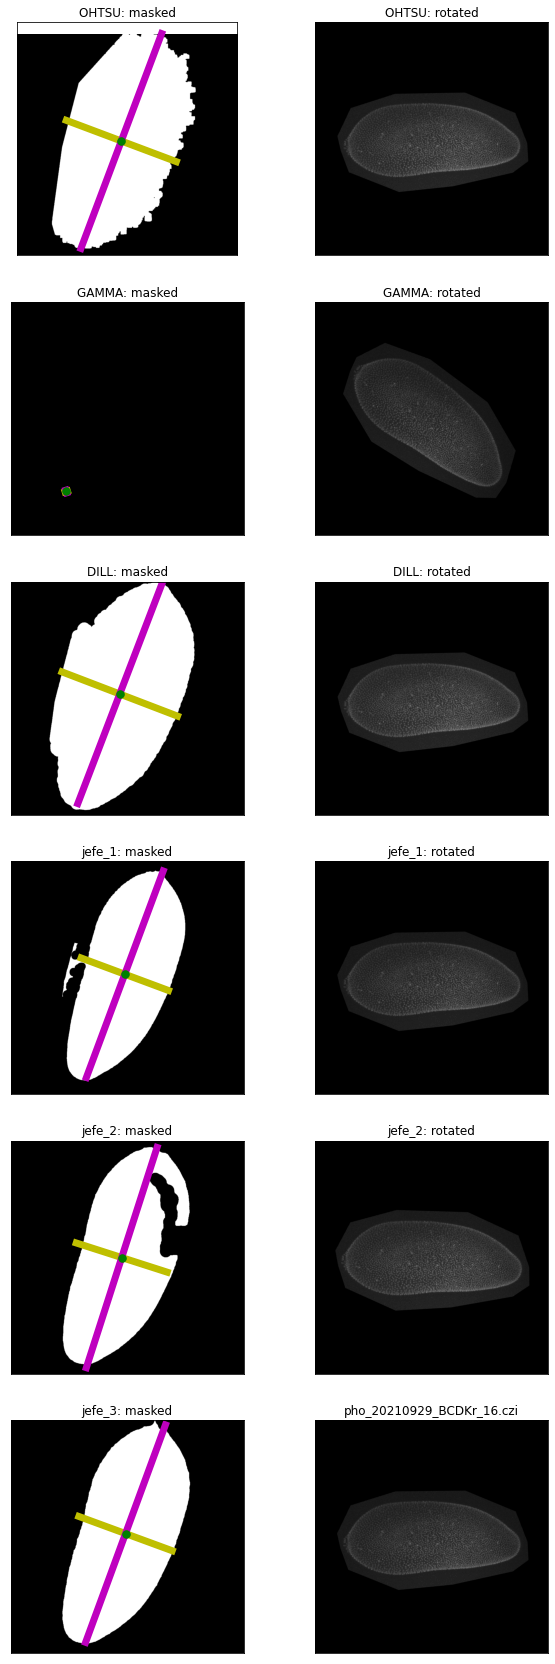

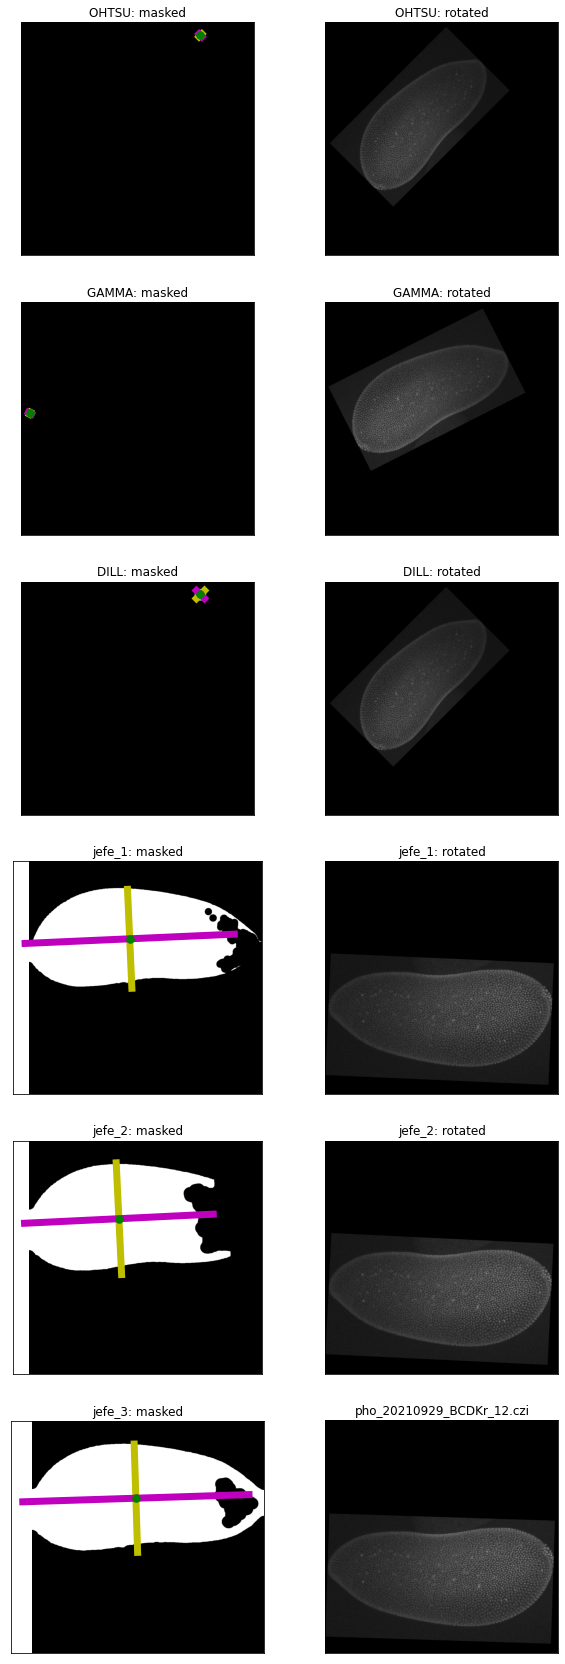

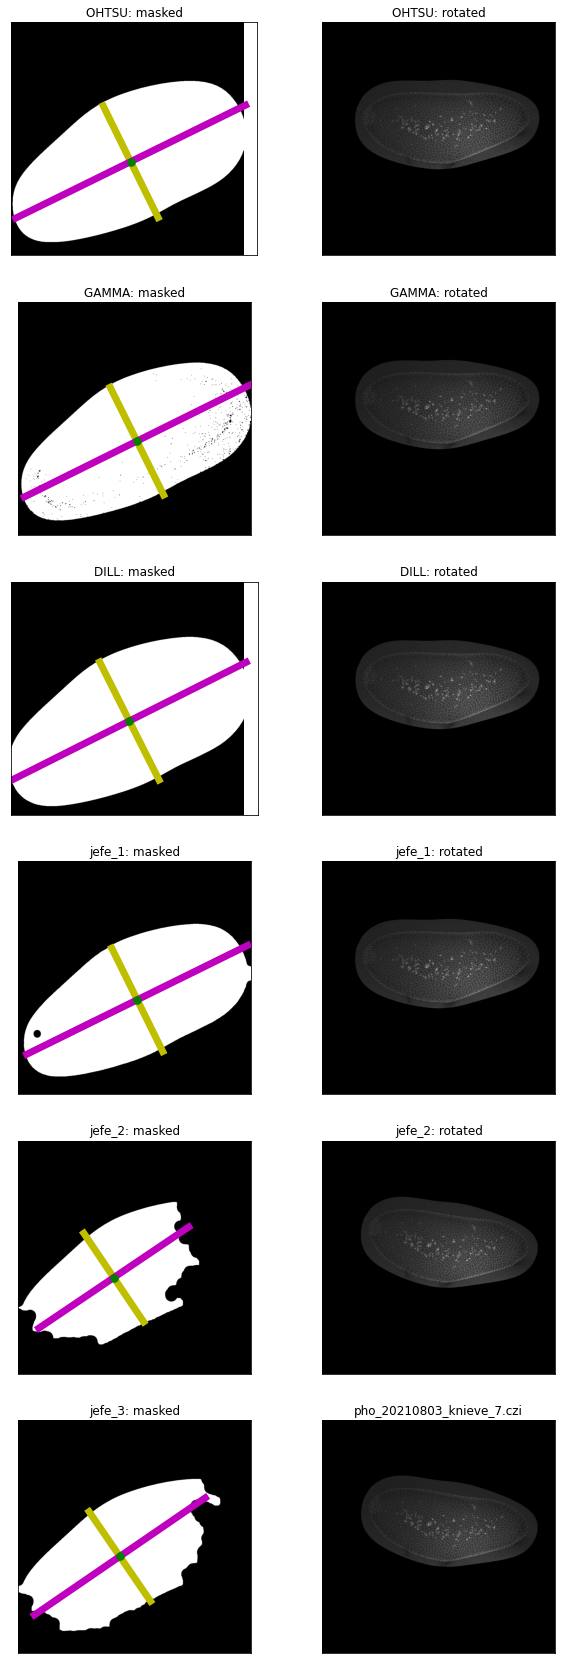

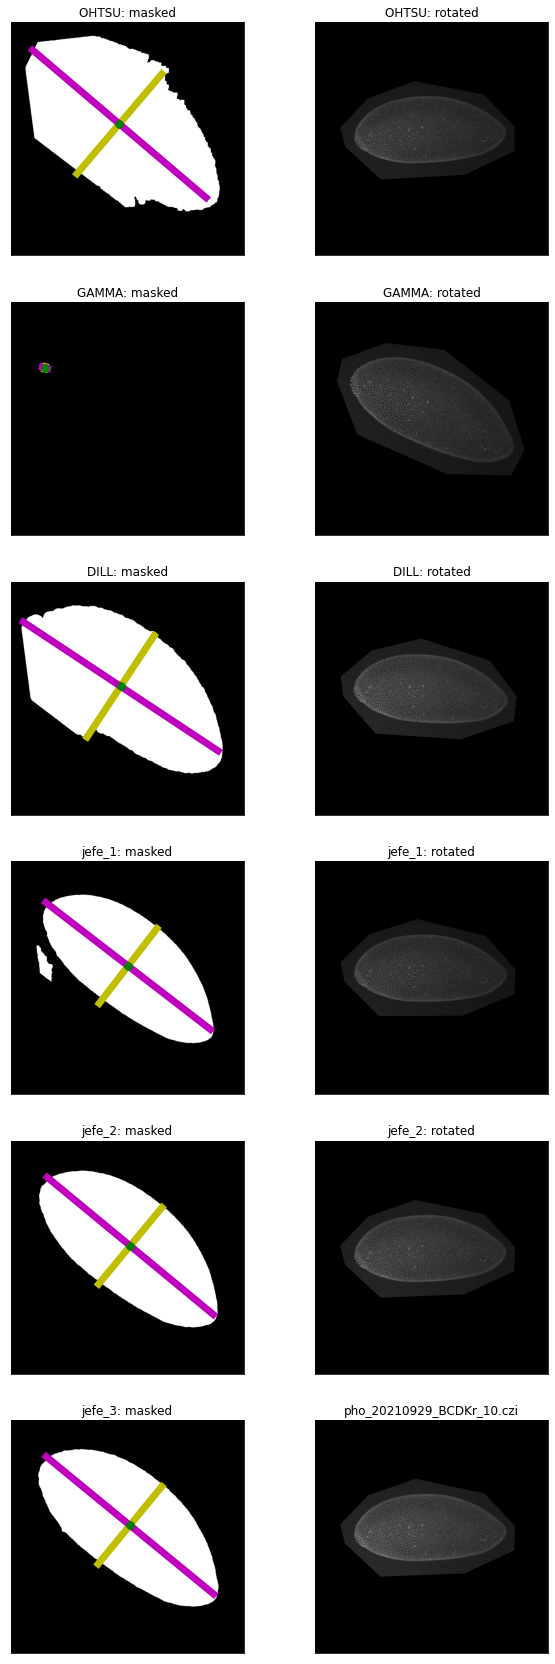

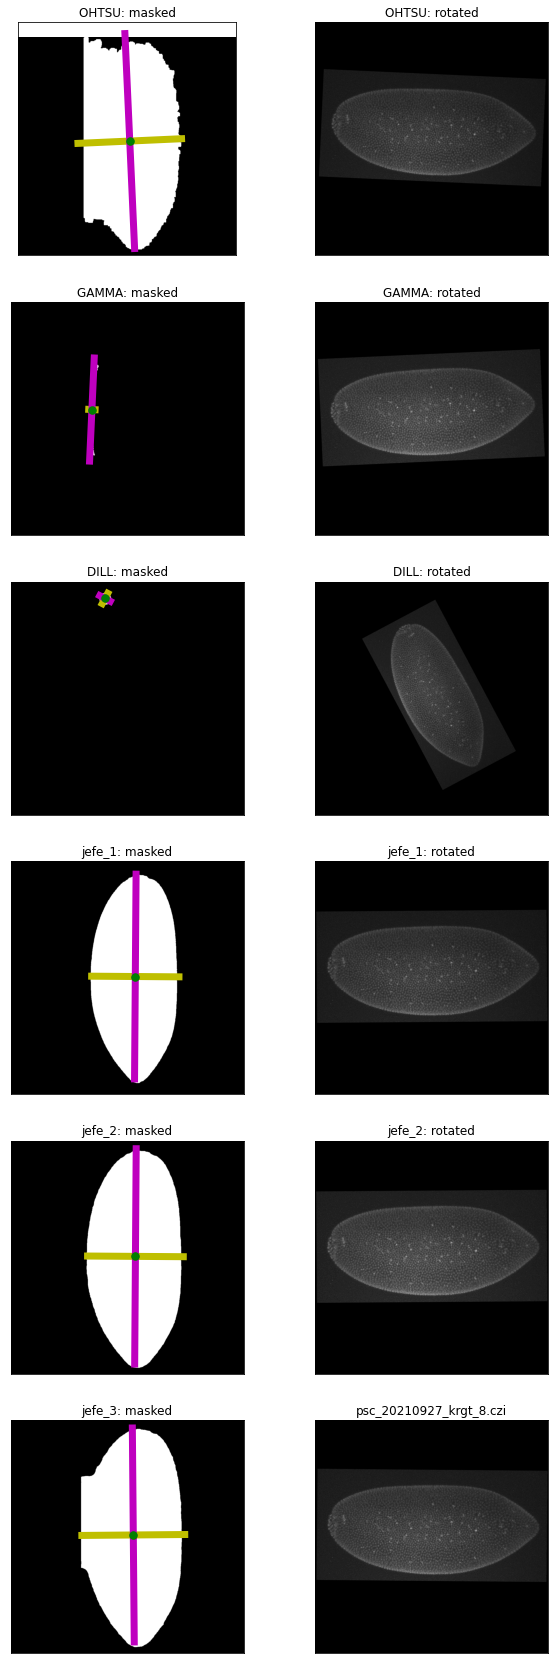

In [6]:
for filename in file_list:
    path = os.path.join(work_dir, filename)
    data,_ = load_data(path, channel_dict, channel_list)
    show_thresh_test(data, ['OHTSU', 'GAMMA', 'DILL', 'jefe_1', 'jefe_2', 'jefe_3'])
    plt.title(filename)
    plt.show()

In [154]:
#OPTION 1
def try_thresh(data, shape_channel):
    footprint=morphology.disk(15)
    
    zshape = data[shape_channel].std(0)
    bkgd = zshape.min()
    zshape -= bkgd
    zshape[zshape < 0] = 0

    bkgd = filters.threshold_otsu(zshape)
    zshape -= bkgd
    zshape[zshape < 0] = 0

    zshape = exposure.adjust_gamma(zshape)
    bkgd = filters.threshold_otsu(zshape)
    max_signal = np.max(zshape)-1

    zshape = filters.threshold_sauvola(zshape)
    zshape = filters.apply_hysteresis_threshold(zshape, bkgd, max_signal)
    zshape = morphology.binary_erosion(zshape, footprint)
    zshape = morphology.binary_closing(zshape)
    zshape = morphology.binary_dilation(zshape, footprint)
    zshape = morphology.binary_closing(zshape)
    zshape = morphology.binary_erosion(zshape, footprint)

    plt.imshow(zshape)
    return zshape

In [156]:
#OPTION 2
def try_thresh(data, shape_channel):
    zshape = data[shape_channel].std(0)
    bkgd = zshape.min()
    zshape -= bkgd
    zshape[zshape < 0] = 0

    bkgd = filters.threshold_otsu(zshape)
    zshape -= bkgd
    zshape[zshape < 0] = 0

    zshape = exposure.adjust_gamma(zshape)
    # fig, ax = filters.try_all_threshold(zshape, figsize=(16,10))

    bkgd = filters.threshold_otsu(np.nanquantile(zshape.flatten(), 0.75))
    max_signal = np.max(zshape)-1#np.quantile(zshape, 0.7) 

    #zshape = filters.threshold_sauvola(zshape)#,r=bkgd)
    zshape = filters.apply_hysteresis_threshold(zshape, bkgd, max_signal)
    zshape = filters.threshold_sauvola(zshape)#,r=bkgd)
    zshape = morphology.binary_closing(zshape)
    footprint=morphology.disk(25)
    zshape = morphology.binary_dilation(zshape, footprint)
    zshape = morphology.binary_closing(zshape)
    zshape = morphology.binary_erosion(zshape, footprint)
    plt.imshow(zshape)
    return zshape

In [12]:
#OPTION 3
def try_thresh(data, shape_channel):
    footprint=morphology.disk(25)
    zshape = data[shape_channel].std(0)
    bkgd = zshape.min()
    zshape -= bkgd
    zshape[zshape < 0] = 0

    bkgd = filters.threshold_otsu(zshape)
    zshape -= bkgd
    zshape[zshape < 0] = 0

    zshape = exposure.adjust_gamma(zshape)
    # fig, ax = filters.try_all_threshold(zshape, figsize=(16,10))
    # bkgd = filters.threshold_otsu(zshape)
    bkgd = filters.threshold_otsu(np.nanquantile(zshape.flatten(), 0.7))
    max_signal = np.max(zshape)-1#np.quantile(zshape, 0.7) 

    #zshape = filters.threshold_sauvola(zshape)#,r=bkgd)
    zshape = filters.apply_hysteresis_threshold(zshape, bkgd, max_signal)
    zshape = filters.threshold_sauvola(zshape)#,r=bkgd)
    zshape = morphology.binary_closing(zshape)
    zshape = morphology.binary_dilation(zshape, footprint)
    zshape = morphology.binary_closing(zshape)
    zshape = morphology.binary_erosion(zshape, footprint)

    plt.imshow(zshape)
    return zshape

/Users/robinhood/miniconda3/envs/imgproc/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: UserWarning: Possible precision loss converting image of type uint32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/robinhood/miniconda3/envs/imgproc/lib/python3.9/site-packages/skimage/util/dtype.py:531: UserWarning: Downcasting uint32 to uint8 without scaling because max value 239 fits in uint8
  return _convert(image, np.uint8, force_copy)


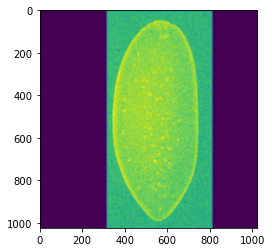

In [9]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
zshape = data[shape_channel].std(0).astype(np.uint32)
# zshape = sobel(zshape)
# zshape = exposure.adjust_gamma(zshape)
entr_img = entropy(zshape, disk(5))
plt.imshow(entr_img)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


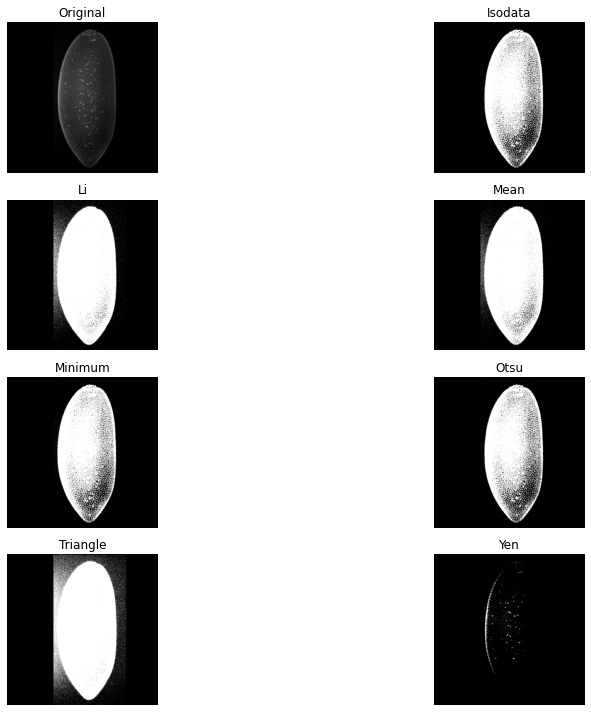

In [107]:
# zshape = data[shape_channel].mean(0)

fig, ax = filters.try_all_threshold(zshape, figsize=(16,10))
